In [ ]:
# Setup kaggle shell library
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Download dataset from Kaggle (direct link: https://www.kaggle.com/dmitrybabko/speech-emotion-recognition-en)
!kaggle datasets download dmitrybabko/speech-emotion-recognition-en

100% 986M/987M [00:20<00:00, 33.3MB/s]
100% 987M/987M [00:20<00:00, 49.5MB/s]


In [ ]:
!mkdir ./data

In [ ]:
%%capture
!unzip speech-emotion-recognition-en.zip -d ./data

In [ ]:
import os

emotions = {
  'happy': 0, 
  'sad': 1, 
  'angry': 2, 
  'disgust': 3, 
  'fear': 4, 
  'neutral': 5
}

ravdess_emotions = {
    '01': emotions['neutral'],
    '03': emotions['happy'],
    '04': emotions['sad'],
    '05': emotions['angry'],
    '06': emotions['fear'],
    '07': emotions['disgust'],
}

crema_emotions = {
  'SAD': emotions['sad'], 
  'ANG': emotions['angry'], 
  'DIS': emotions['disgust'],
  'FEA': emotions['fear'], 
  'HAP': emotions['happy'], 
  'NEU': emotions['neutral']
}

savee_emotions = {
    'a': emotions['angry'],
    'd': emotions['disgust'],
    'f': emotions['fear'],
    'h': emotions['happy'],
    'n': emotions['neutral']
}

processed_data = []

data_path = "/content/data"
for root, dirs, files in os.walk(data_path):
  for file in files:
    file_path = os.path.join(root, file)

    dataset = file_path.split('/')[3]
    if dataset == 'Ravdess':
      emotion_label = ravdess_emotions.get(file.split('-')[2], None)
    elif dataset == 'Crema':
      emotion_label = crema_emotions.get(file.split('_')[2], None)
    elif dataset == 'Tess':
      emotion_label = emotions.get(file.split('_')[2].split('.')[0], None)
    else:
      emotion_code = file.split('_')[1][:2]
      if (emotion_code == 'sa'):
        emotion_label = emotions['sad']
      else:
        emotion_label = savee_emotions.get(emotion_code[0], None)

    if (emotion_label != None):
      processed_data.append([file_path, dataset, emotion_label])

print(len(processed_data))

11318


In [ ]:
import librosa
import librosa.display
import numpy as np

In [ ]:
def extract_features(audio, sample_rate):
  result = np.array([])

  mfccs = np.mean(librosa.feature.mfcc(y = audio, sr = sample_rate).T, axis = 0)
  result = np.hstack((result, mfccs))

  chroma = np.mean(librosa.feature.chroma_stft(y = audio, sr = sample_rate).T, axis = 0)
  result = np.hstack((result, chroma))

  mel = np.mean(librosa.feature.melspectrogram(y = audio, sr = sample_rate).T, axis = 0)
  result = np.hstack((result, mel))

  # temp plotting
  M = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
  M_db = librosa.power_to_db(M, ref=np.max)
  img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time')
  
  return result

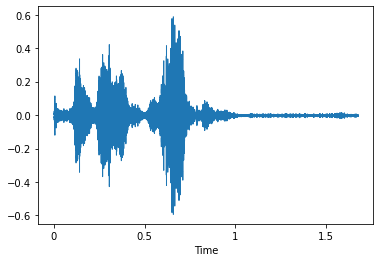

In [ ]:
audio, sample_rate = librosa.core.load('/content/data/Crema/1001_DFA_ANG_XX.wav', duration = 3.5, offset = 0.6)
librosa.display.waveshow(y = audio, sr = sample_rate)

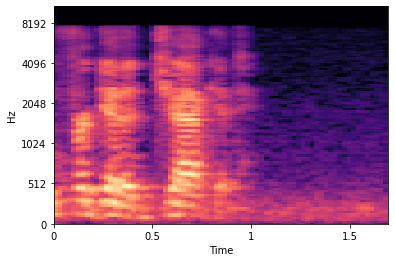

In [ ]:
features = extract_features(audio, sample_rate)

In [ ]:
print(features)

[-3.33459259e+02  1.25845512e+02 -1.87468452e+01  4.59970131e+01
 -4.75265884e+00  1.96210785e+01 -2.45284767e+01 -3.38167548e+00
 -1.16423531e+01 -8.40588868e-01 -1.19108047e+01 -2.98799086e+00
 -1.55978441e+00 -1.65051346e+01  1.06782761e+01 -1.43087673e+01
 -5.58251047e+00 -3.64874387e+00 -8.67005885e-01 -9.32270527e+00
  4.08439875e-01  4.03541028e-01  4.29207444e-01  4.01491910e-01
  4.24825698e-01  3.25818717e-01  3.13646525e-01  3.92527074e-01
  3.55548590e-01  3.94063473e-01  5.95347881e-01  5.69545269e-01
  3.27651366e-03  5.93286986e-03  4.18465845e-02  3.28012586e-01
  1.03256607e+00  1.86723268e+00  2.89884239e-01  2.90871114e-01
  4.95812863e-01  1.74896181e+00  3.71089935e+00  3.22640371e+00
  8.52094233e-01  4.48237807e-01  8.40341806e-01  6.11676693e-01
  2.98574686e+00  6.80687094e+00  8.48672867e+00  5.41103506e+00
  1.35269094e+00  2.01214671e+00  1.21907628e+00  1.41473830e+00
  7.25587368e+00  1.59129465e+00  3.00430149e-01  1.81827471e-01
  3.20403844e-01  2.67149